# Introduction to Confidence Intervals in Data Analytics

## Objective:

- Introduce the concept of Confidence Intervals (CI) in simple terms.
- Explain how CI helps in data analytics and decision-making.

The notebook has a toggle markdown cell `"Compare Answer"`
You can click to toggle to validate if your answer is close. It does not have to be exact. 

## What is this "Confidence Interval" we see in many public reports?
 - [Trump Approval Rate](https://www.economist.com/sites/default/files/images/print-edition/20200222_USC189.png) ([source](https://www.economist.com/united-states/2020/02/22/why-donald-trumps-high-approval-ratings-may-be-misleading))
 - [Germany Election 2021 Polls](https://blog.datawrapper.de/data-visualizations-german-election-2021-with-datawrapper/)
 - [Income Germany](https://www.gut-leben-in-deutschland.de/report/income/)
 - [Montana senator voting polls](https://www.strategies360.com/strategies-360-releases-exclusive-poll-with-nbc-montana/) 

# Confidence Intervals in Data Analytics: A Beginner's Guide

### What is a Confidence Interval (CI)?

A Confidence Interval is a range of values that is likely to contain a population parameter (like a mean or proportion) with a certain level of confidence. It gives us an idea of how uncertain we are about our estimate.

### Why are Confidence Intervals important in Data Analytics?

In data analytics, we often deal with samples rather than entire populations. Confidence intervals help us understand the uncertainty in our estimates and make better decisions based on our data.


---

## Populations? Samples? Populations, Samples and CI????


### Population
Definition:

Population refers to the entire set of individuals, items, or data points of interest. 

It includes every possible observation or measurement you could potentially collect.

In statistics, a population could be finite (e.g., all the students in a school) or infinite (e.g., all possible flips of a fair coin).
Example:

If you’re analyzing customer satisfaction, your population might be all customers who have ever purchased from your company.

### Sample
Definition:

A sample is a subset of the population that is selected for analysis. Instead of collecting data from the entire population, which is often impractical or impossible, you collect data from a smaller group (the sample).
The goal is to use the sample to make inferences about the entire population.
Example:

If your population is all customers, a sample might be 500 customers who responded to a recent survey.

![sample_population](./images/sample_population.jpg)

### How Samples and Populations Are Related to Confidence Intervals
Why Use a Sample?

**Time and Cost Constraints:** Collecting data from an entire population can be time-consuming and expensive.

**Feasibility:** In some cases, it's simply impossible to collect data from the entire population (e.g., testing every product off an assembly line).

Since you’re using a sample rather than the whole population, there’s uncertainty about how well the sample represents the population. This is where confidence intervals come into play.



### Confidence Intervals and Their Relation to Population and Sample:

Sample Mean vs. Population Mean:

The sample mean is the average of your sample data. It's an estimate of the population mean (the true average of the entire population).
Since different samples can give different sample means, you need a way to express the uncertainty in your estimate.

Confidence Interval (CI):

A confidence interval provides a range of values within which you expect the true population parameter (e.g., the population mean) to lie, based on your sample data.

The width of the CI reflects the uncertainty in your estimate. A narrower CI indicates more precise estimates, while a wider CI suggests more uncertainty.

The confidence level (e.g., 95%) tells you how sure you can be that the interval contains the true population mean. For example, a 95% CI means that if you were to take 100 different samples and compute a CI for each, about 95 of those intervals would contain the true population mean.


### Example in Context:

Suppose you’re studying the average height of students in a university. The population is all students in the university, but you can only measure the height of a sample of 100 students.

Sample Mean: You calculate the average height of these 100 students (e.g., 170 cm).

Confidence Interval: Using statistical methods, you calculate a 95% confidence interval of (168 cm, 172 cm) for the population mean height. This means you are 95% confident that the true average height of all students in the university lies between 168 cm and 172 cm.

### Key Takeaways
Population: The entire group you're interested in studying.

Sample: A smaller group selected from the population, used to make inferences about the population.


Confidence Interval (CI): A range of values, derived from the sample, that is likely to contain the population parameter (e.g., mean), along with a confidence level (e.g., 95%) indicating the certainty of that range.


---
# Working with a Generated Dataset that is Normally Distributed


Normal Distribution with Known Population Parameters

Scenario:

You work for a pharmaceutical company that produces a medication with a known population mean dosage strength of 50 mg and a standard deviation of 5 mg. 

Your task is to calculate the 95% confidence interval for the mean dosage strength of a new batch of 100 tablets.

## What Data type are you working with?


Your answer here:



<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Data Type: Continuous (Dosage strength is measured in milligrams, which can take any value within a range)</p>
  
</details>

## Identify the Analytical Question:

Your answer here:



<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p> Is the new batch consistent with the historical data? Specifically, what is the 95% confidence interval for the mean dosage strength of the new batch?</p>
  
</details>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv("data/dosage_strength.csv")

## Calculate the Descriptive Stats

In [3]:
sample_mean = df['DosageStrength'].mean()
sample_std = df['DosageStrength'].std()
sample_median = df['DosageStrength'].median()
n = len(df)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Sample Median: {sample_median:.2f}")

Sample Mean: 49.48
Sample Standard Deviation: 4.54
Sample Median: 49.37


## Visualize the Data to check the Distribution

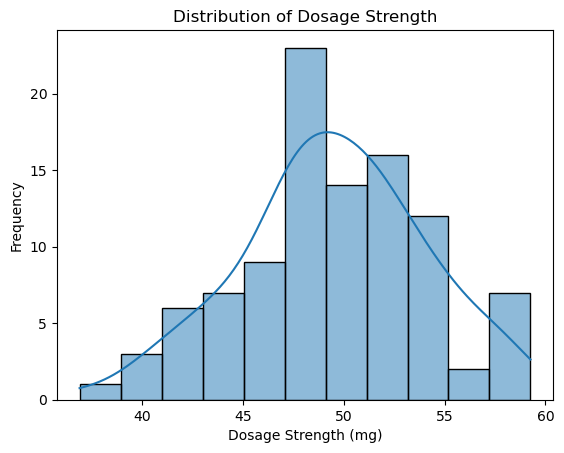

In [6]:
# Visualize the distribution
sns.histplot(df['DosageStrength'], kde=True)
plt.title("Distribution of Dosage Strength")
plt.xlabel("Dosage Strength (mg)")
plt.ylabel("Frequency")
plt.show()

## Interpret the Graph and Descriptive Statistics:

Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p> Graph: The histogram should show a bell-shaped curve, confirming the normal distribution of the data.
  
Descriptive Statistics: The mean and median should be close to each other, further confirming the normality of the data.</p>
  
</details>

## Check if Population Parameters are Known

Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p> Population Mean (μ): Known (50 mg)
  
Population Standard Deviation (σ): Known (5 mg)</p>
  
</details>

## Calculate the Confidence Interval

![CI](./images/CI.jpg)

In [7]:
from scipy.stats import norm


# 95% CI meaning we want to capture the middle 95% of the data. This leaves 5% of the data i.e. 2.5% on either tail
# Hence why we use .975 to establish upper bound of the CI and lower bound

z_score = norm.ppf(0.975) # Z-score since the data is normal and population params are known
margin_of_error = z_score * (5 / np.sqrt(n))  # 5 is the standard error 
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval for the Mean Dosage Strength: ({ci_lower:.2f}, {ci_upper:.2f}) mg")


95% Confidence Interval for the Mean Dosage Strength: (48.50, 50.46) mg


## Understanding Confidence Intervals


### What is a 95% Confidence Interval?

A 95% confidence interval is a range of values that you can be 95% certain contains the true population mean. It is calculated using the following formula:


In [19]:
from IPython.display import display, Math

# Display LaTeX formula for confidence interval
display(Math(r'\text{CI} = \left(\bar{x} - Z \times \frac{\sigma}{\sqrt{n}}, \bar{x} + Z \times \frac{\sigma}{\sqrt{n}}\right)'))

# Display additional text for definitions with explicit newline characters
display(Math(r'\text{Where:} \newline \bar{x} \text{ is the sample mean} \newline Z \text{ is the Z-score corresponding to the desired confidence level (e.g., 1.96 for 95\%)} \newline \sigma \text{ is the population standard deviation} \newline n \text{ is the sample size}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Interpretation of the Confidence Interval

The 95% confidence interval for the mean of our sample is (48.50, 50.46) mg. This means that we are 95% confident that the true population mean lies within this interval.

### What Does This Mean for Data Analytics?

In data analytics, confidence intervals help us make informed decisions. For example, if you're estimating the average customer satisfaction score, a confidence interval gives you a range where the true average score is likely to fall. This helps in making more accurate predictions and reducing uncertainty.


----

## CI Interpretation 

### Case Study: Average Monthly Sales

Imagine you are a data analyst at a retail company.  You've taken a sample of monthly sales data and calculated the mean sales to be 50.000 dollars with a standard deviation of 10.000 dollars. You want to estimate the true average monthly sales for the entire company.

Using the confidence interval, you calculate that the 95% CI for the average monthly sales is between 47.000 and 53.000.

### Decision Making:

- **Scenario 1**: The company plans to launch a new product if the average monthly sales exceed 48.000. Since the lower bound of our CI is above 48.000, you can confidently recommend proceeding with the launch.
  
- **Scenario 2**: If the company had required an average monthly sales of 52.000 for the product launch, you might recommend further investigation, as the upper bound of the CI barely exceeds this threshold.


---

### Case Study: Interpreting a Confidence Interval (CI)
**Scenario:**
You are a data analyst working for a public health organization.

Recently, your team conducted a study to assess the average daily intake of sodium among adults in your city. 
 
The goal was to understand whether the average sodium intake is within the recommended limit of 2,300 mg per day.

After collecting data from a random sample of 200 adults, your team calculated a 95% confidence interval (CI) for the mean daily sodium intake, which turned out to be (2,100 mg, 2,500 mg).

**Task:**
Your task is to interpret this confidence interval in the context of the study. Specifically, address the following questions:

What does the confidence interval tell you about the average daily sodium intake in the city?

Can you confidently say that the average daily sodium intake is within the recommended limit of 2,300 mg per day? Why or why not?

How would you communicate the results to a non-technical audience, such as public health officials or the general public?


Your answers here:



<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p> 
  
#### Interpretation and Answers:

- What does the confidence interval tell you about the average daily sodium intake in the city?

        The confidence interval (2,100 mg, 2,500 mg) provides a range in which we are 95% confident that the true average daily sodium intake of all adults in the city lies. 

        This means that, based on the sample data, the actual average sodium intake could be as low as 2,100 mg or as high as 2,500 mg.


- Can you confidently say that the average daily sodium intake is within the recommended limit of 2,300 mg per day? Why or why not?

        No, you cannot confidently say that the average sodium intake is within the recommended limit. While the lower bound of the confidence interval (2,100 mg) is below the limit, the upper bound (2,500 mg) exceeds the recommended intake. This suggests that it is possible, based on your data, that the average sodium intake in the population could be above the recommended level.

- How would you communicate the results to a non-technical audience, such as public health officials or the general public?

        "Our study shows that the average sodium intake for adults in our city likely falls between 2,100 mg and 2,500 mg per day. While some people may be consuming sodium levels below the recommended limit of 2,300 mg, it is also possible that many are exceeding this limit. Therefore, it is important to consider public health strategies that encourage people to reduce their sodium intake to stay within safe levels."


#### Key Points for Interpretation:

- A confidence interval gives a range of values that likely contains the true population parameter.

- If the confidence interval includes values both above and below a threshold of interest (like the recommended sodium limit), you cannot definitively conclude whether the population meets that threshold.

- When communicating to non-technical audiences, it's important to explain the implications of the confidence interval in practical terms, focusing on potential actions or concerns.</p>
  
</details>

---

# Case Study: Estimating the Median Income of a City

Scenario:
You are a data analyst at a consulting firm, and your client is interested in estimating the median household income of a city. 

The distribution of incomes is often skewed, with a few very high incomes pulling the mean upward. 

Therefore, using the median as a measure of central tendency is more appropriate than using the mean.

Because the data is skewed, we cannot assume a normal distribution, so we need to approach the problem differently when calculating confidence intervals.

## What Data type are you working with?




Your answer here:

<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Data Type: Continuous (Annual income is measured in dollars, which can take any value within a range)</p>
  
</details>

## Identify the Analytical Question:

Your answer here:



<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>What is the 95% confidence interval for the median income of the residents?</p>
  
</details>

## Calculate the Descriptive stats

In [9]:
# Load the dataset
df = pd.read_csv('data/income_data.csv')

# Calculate Descriptive Statistics
sample_mean = df['AnnualIncome'].mean()
sample_std = df['AnnualIncome'].std()
sample_median = df['AnnualIncome'].median()
n = len(df)

print(f"Sample Mean: ${sample_mean:.2f}")
print(f"Sample Standard Deviation: ${sample_std:.2f}")
print(f"Sample Median: ${sample_median:.2f}")


Sample Mean: $48625.30
Sample Standard Deviation: $48625.49
Sample Median: $34339.13


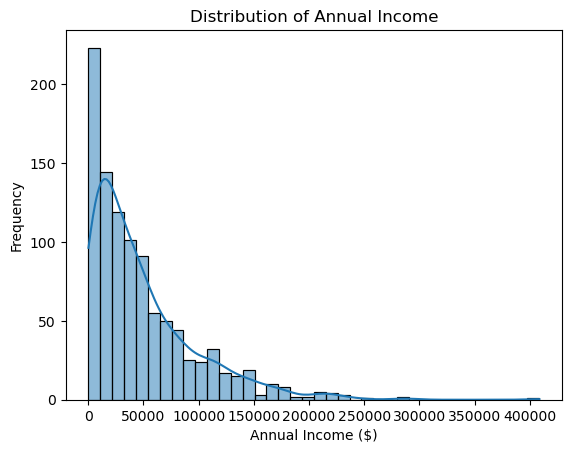

In [10]:
# Visualize the data
sns.histplot(df['AnnualIncome'], kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Frequency")
plt.show()


## Interpret the Graph and Descriptive Statistics:



Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Graph: The histogram is likely to be right-skewed, indicating that a few individuals have very high incomes compared to the majority.
  
Descriptive Statistics: The mean is likely higher than the median due to the skewness. This suggests that the median is a better measure of central tendency for this data.</p>
  
</details>

## Check if Population Parameters are Known


Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Population Mean (μ): Unknown

Population Standard Deviation (σ): Unknown</p>
  
</details>

### About the Dataset

This dataset contains 1000 household incomes that follow a **right-skewed distribution**. 

Most incomes are clustered towards the lower end, but there are some very high incomes that create a long tail on the right.

This type of distribution is common for income data.

Since the data is not normally distributed, we will focus on estimating the **median** income rather than the mean. 

Additionally, we will use **bootstrapping** to calculate the confidence interval for the median.


### Why Bootstrapping?

Since the income data is not normally distributed, traditional methods like the Z-distribution aren't appropriate. 

Bootstrapping allows us to estimate the confidence interval without assuming normality, making it a versatile tool in non-parametric settings.

Bootstrapping is a resampling technique that involves repeatedly drawing samples (with replacement) from a dataset to estimate a population parameter (like the mean, median, standard deviation, etc.) and its confidence interval.

The key idea behind bootstrapping is to treat the sample you have as if it were a representation of the population. By resampling from this sample, you can simulate what it would be like to draw new samples from the population without having access to the full population.

How Does Bootstrapping Work?
Bootstrapping involves three main steps:

1. Resample with Replacement
Resampling with Replacement: This means that when you draw a sample from the data, you put the sampled observation back into the data so that it can be selected again in subsequent draws. This allows each resampled dataset to be different from the others.

You create multiple new "bootstrap samples" from the original dataset. The size of each bootstrap sample is usually the same as the original sample.

2. Calculate the Statistic of Interest
For each bootstrap sample, you calculate the statistic you are interested in (e.g., the median, mean, or variance). This gives you a distribution of the statistic based on the resampled data.

3. Estimate the Confidence Interval
Once you have the distribution of your statistic from all the bootstrap samples, you can estimate the confidence interval by finding the appropriate percentiles of this distribution (e.g., the 2.5th and 97.5th percentiles for a 95% confidence interval).

In [12]:
# Step 1: Calculate the sample median
sample_median = df['AnnualIncome'].median()
print(f"Sample Median Income: ${sample_median:.2f}")

# Step 2: Define a bootstrapping function to calculate the CI
def bootstrap_ci(data, num_bootstrap=1000, confidence_level=0.95):
    # Create bootstrap samples and calculate the median for each sample
    bootstrapped_medians = []
    n = len(data)
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrapped_medians.append(np.median(sample))
    
    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = np.percentile(bootstrapped_medians, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_medians, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Step 3: Calculate the 95% confidence interval using bootstrapping
ci_lower, ci_upper = bootstrap_ci(df['AnnualIncome'], num_bootstrap=1000, confidence_level=0.95)
print(f"95% Confidence Interval for the Median Income: (${ci_lower:.2f}, ${ci_upper:.2f})")


Sample Median Income: $34339.13
95% Confidence Interval for the Median Income: ($30645.29, $37090.04)


### Interpretation of Results

The sample median income is approximately $34339.13. Based on the bootstrapping method, the 95% confidence interval for the median income is ($30645.29, $37090.04). This means that we are 95% confident that the true median household income in the city lies within this range.

### Application to Decision-Making

- **Scenario 1:** If the city government is planning financial aid programs for households earning below the median income, this confidence interval gives them a range to target. 
- **Scenario 2:** If a new policy aims to increase the median income, understanding the current range helps assess the policy's impact over time.




In [13]:
# Experiment with different sample sizes or bootstrap iterations
sample_sizes = [100, 500, 1000]
for size in sample_sizes:
    ci_lower, ci_upper = bootstrap_ci(df['AnnualIncome'].sample(size), num_bootstrap=1000, confidence_level=0.95)
    print(f"95% CI for Median Income with sample size {size}: (${ci_lower:.2f}, ${ci_upper:.2f})")


95% CI for Median Income with sample size 100: ($20945.81, $42466.71)
95% CI for Median Income with sample size 500: ($28831.08, $39812.63)
95% CI for Median Income with sample size 1000: ($30407.96, $36958.95)


Key Points:

- Non-normal data often arises in real-world scenarios (e.g., income, wait times, or any data with skewness).

- Median is a better measure of central tendency for skewed data.

- Bootstrapping is a flexible, non-parametric method that can be used to calculate confidence intervals without assuming normality.

- This approach is particularly useful when the sample size is small, or the distribution is heavily skewed.

# Selecting CI Calculation Methods

### Confidence Interval Calculation Methods

| **Criteria**                           | **Scenario**                                 | **CI Calculation Method**                     | **When to Use**                                                                                                 | **Example Code** |
|----------------------------------------|----------------------------------------------|-----------------------------------------------|-----------------------------------------------------------------------------------------------------------------|------------------|
| **Distribution Type: Normal**           | **1. Known Population Std Dev (σ)**           | Z-Distribution (Z-Score)                      | Use when data is normally distributed and the population standard deviation is known.                           | `stats.norm.interval()` in Python’s SciPy |
|                                        | **2. Unknown Population Std Dev**             | T-Distribution (Student's t-test)             | Use when data is normally distributed but the population standard deviation is unknown, typically with smaller sample sizes. | `stats.t.interval()` in Python’s SciPy |
| **Sample Size: Large (n > 30)**         | **3. Large Sample Size, Unknown Distribution** | Central Limit Theorem (CLT) + Z-Distribution  | Use when sample size is large, allowing the use of the Z-distribution even if the underlying distribution is unknown. | `stats.norm.interval()` in Python’s SciPy |
| **Sample Size: Small (n < 30)**         | **4. Small Sample Size, Non-Normal Distribution**| T-Distribution or Non-Parametric Methods      | Use the t-distribution for approximately normal data or bootstrapping if data is significantly non-normal. | `stats.t.interval()` or bootstrapping |
| **Distribution Type: Non-Normal**       | **5. Non-Normal Distribution, Focus on Median** | Bootstrapping                                 | Use when data is non-normal (e.g., skewed) and you need to estimate the median or other non-mean statistics. | Custom bootstrapping function in Python |
| **Data Type: Proportion**                | **6. Proportion Data (Binary Outcomes)**      | Wilson Score Interval / Normal Approximation  | Use for proportion data (e.g., success/failure). Normal approximation for large samples; Wilson Score for more accuracy. | `stats.proportion_confint()` in Python’s StatsModels |
| **Variance Estimation**                 | **7. Confidence Interval for Variance**       | Chi-Square Distribution                       | Use when estimating confidence intervals for population variance or standard deviation from normally distributed data. | `stats.chi2.interval()` in Python’s SciPy |
| **Correlated Data**                     | **8. Time-Series or Correlated Data**         | Block Bootstrapping / Moving Block CI         | Use for time series or data with correlations where traditional bootstrapping isn't appropriate. | Custom block bootstrapping code |
| **Proportion Data: Small Sample**        | **9. Confidence Interval for Proportions, Small Sample** | Exact Binomial CI (Clopper-Pearson Interval)  | Use for binary outcomes and small sample sizes where normal approximation isn't accurate.        | `statsmodels.stats.proportion.proportion_confint(method='exact')` |
| **Bayesian Approach**                   | **10. Bayesian Methods for CI**               | Bayesian Credible Intervals                  | Use when a probabilistic interpretation of the interval is desired (e.g., 95% probability that the true parameter lies within the interval). | `pymc3` or `scipy.stats.bayes_mvs()` |

### Key Points:

1. **Z-Distribution (Z-Score):**
   - **When to Use:** For normal distributions where the population standard deviation is known or when sample size is large (n > 30).
   - **Example Use:** Large samples where CLT applies or known standard deviation.

2. **T-Distribution:**
   - **When to Use:** For normal distributions with unknown population standard deviation, particularly with small sample sizes (n < 30).
   - **Example Use:** Small samples or unknown standard deviation in normal distributions.

3. **Bootstrapping:**
   - **When to Use:** For non-normal distributions or when estimating confidence intervals for statistics like the median. It’s a non-parametric method that doesn’t assume any specific distribution.
   - **Example Use:** Skewed data or non-parametric statistics.

4. **Proportion Data:**
   - **When to Use:** Wilson Score or exact methods for small samples, while normal approximation is suitable for large samples.
   - **Example Use:** Proportion data in surveys or experiments.

5. **Chi-Square Distribution:**
   - **When to Use:** For confidence intervals of variance or standard deviation in normally distributed data.
   - **Example Use:** Variance estimation in quality control.

6. **Bayesian Methods:**
   - **When to Use:** For a probabilistic interpretation of confidence intervals.
   - **Example Use:** Bayesian analysis providing a probability-based interval estimate.
